<a href="https://colab.research.google.com/github/RubenRomeroTorrado/greends-avcad-2024/blob/main/Exercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [3]:
df = pd.read_csv('EFIplus_medit (1).zip',compression='zip', sep=";")
print(df)
df.head(10)
df.info()
print(list(df.columns))

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo   
...          ...        ...        ...       ...            ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga   

     Water_source_type Flow_regime  Altitude Geological_typology  \
0              Pluvial   Permanent       199           Siliceous   
1          Groundwater   Permanent      1253          Calca

In [5]:
# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True"

In [6]:
# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes
# Number of values per variable
df.count()

Site_code                               5011
Latitude                                5011
Longitude                               5011
Country                                 5011
Catchment_name                          5011
Water_source_type                       4712
Flow_regime                             4473
Altitude                                5011
Geological_typology                     5011
Actual_river_slope                      4975
Natural_sediment                        4402
Elevation_mean_catch                    4841
prec_ann_catch                          4841
temp_ann                                4841
temp_jan                                4841
temp_jul                                4841
Barriers_catchment_down                 5011
Barriers_river_segment_up               5009
Barriers_river_segment_down             5009
Barriers_number_river_segment_up        5008
Barriers_number_river_segment_down      5009
Barriers_distance_river_segment_up      4998
Barriers_d

In [7]:
# Number of missing values (NaN) per variable
df.isnull().sum()

Site_code                                  0
Latitude                                   0
Longitude                                  0
Country                                    0
Catchment_name                             0
Water_source_type                        299
Flow_regime                              538
Altitude                                   0
Geological_typology                        0
Actual_river_slope                        36
Natural_sediment                         609
Elevation_mean_catch                     170
prec_ann_catch                           170
temp_ann                                 170
temp_jan                                 170
temp_jul                                 170
Barriers_catchment_down                    0
Barriers_river_segment_up                  2
Barriers_river_segment_down                2
Barriers_number_river_segment_up           3
Barriers_number_river_segment_down         2
Barriers_distance_river_segment_up        13
Barriers_d

In [8]:
df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [9]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [10]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


In [11]:
print(df['Catchment_name'].mode())

0    Ebro
Name: Catchment_name, dtype: object


In [12]:
# A fast way of getting a summary statistics of quantitative data (int or float)
df.describe()

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,4975.000000,4402.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,428.072042,14.582432,3.062017,785.177935,941.823810,13.261950,6.211403,20.604503,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,342.912849,22.596125,0.567240,432.725266,292.497317,2.172315,2.662325,2.583101,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,1.000000,52.249944,373.366940,3.900000,-2.700000,11.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,142.000000,3.509500,3.000000,468.393265,677.473828,12.000000,4.300000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,375.000000,8.000000,3.000000,701.438554,968.898321,13.400000,6.400000,20.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,610.500000,17.170000,3.000000,1049.983330,1168.356822,14.600000,8.300000,22.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1851.000000,774.000000,4.000000,2545.546876,1739.000486,18.300000,12.500000,28.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df2.head() # after dropping NaNs

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,Nival,Permanent,1179,Siliceous,0.001,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,Nival,Permanent,1038,Siliceous,2.258,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,Pluvial,Permanent,636,Siliceous,0.263,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,Pluvial,Permanent,890,Calcareous,2.909,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,Groundwater,Permanent,872,Calcareous,3.530,...,0,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


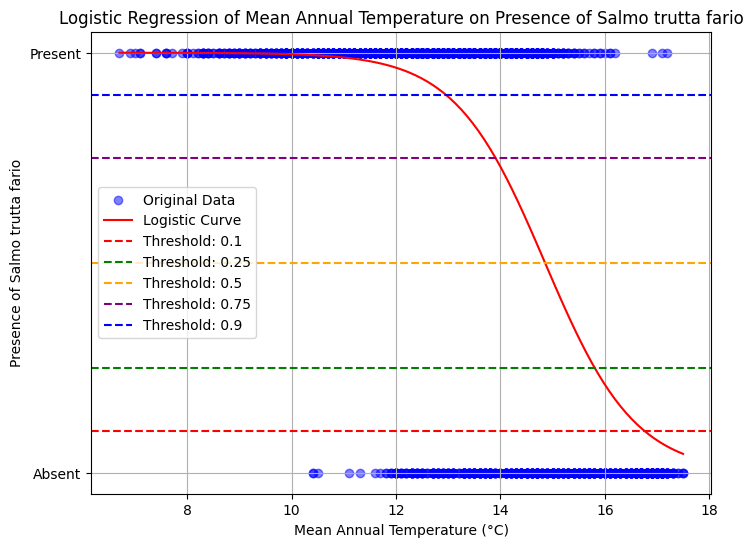

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Load the data from the CSV file
df = pd.read_csv('EFIplus_medit (1).zip', compression='zip', sep=";")

# Extracting x and y data
x_data = df2[['temp_ann']]
y_data = df2['Salmo trutta fario']

# Perform logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

# Generate data points for the logistic curve
x_fit = np.linspace(min(x_data.values.flatten()), max(x_data.values.flatten()), 100).reshape(-1, 1)
y_fit = log_reg.predict_proba(x_fit)[:, 1]

# Plotting the original data and the logistic curve
plt.figure(figsize=(8, 6))
plt.scatter(df2['temp_ann'], df2['Salmo trutta fario'], color='blue', alpha=0.5, label='Original Data')
plt.plot(x_fit, y_fit, color='red', label='Logistic Curve')

# Adding thresholds
thresholds = [0.1, 0.25, 0.5, 0.75, 0.9]
colors = ['red', 'green', 'orange', 'purple', 'blue']
for threshold, color in zip(thresholds, colors):
    plt.axhline(y=threshold, color=color, linestyle='--', label=f'Threshold: {threshold}')

plt.title('Logistic Regression of Mean Annual Temperature on Presence of Salmo trutta fario')
plt.xlabel('Mean Annual Temperature (°C)')
plt.ylabel('Presence of Salmo trutta fario')
plt.yticks([0, 1], ['Absent', 'Present'])

plt.legend()
plt.grid(True)
plt.show()


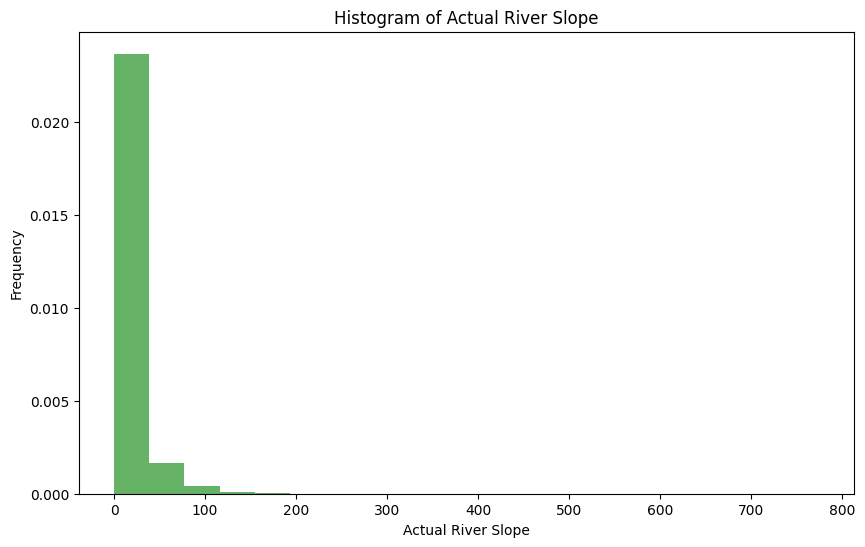

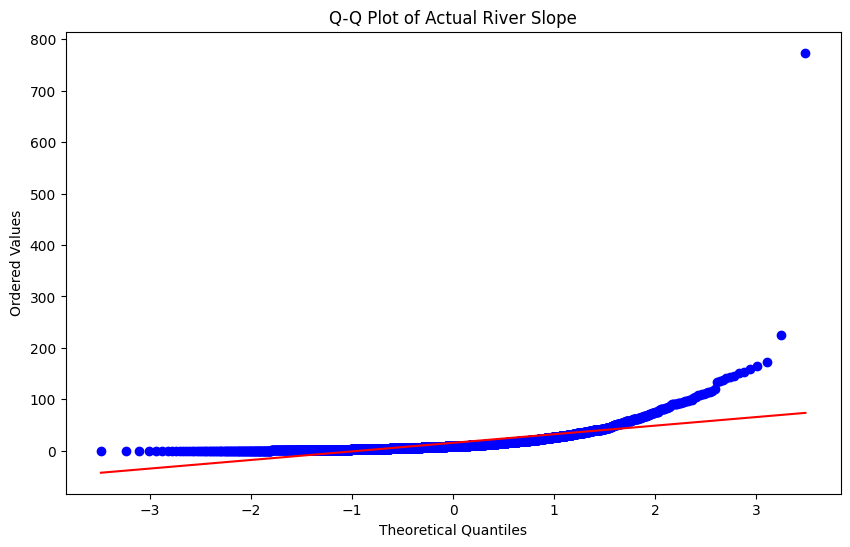

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Assuming df is your DataFrame containing the 'actual_river_slope' data
actual_river_slope = df2['Actual_river_slope']

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(actual_river_slope, bins=20, density=True, alpha=0.6, color='g')
plt.title('Histogram of Actual River Slope')
plt.xlabel('Actual River Slope')
plt.ylabel('Frequency')

# Visualization - Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(actual_river_slope, dist="norm", plot=plt)
plt.title('Q-Q Plot of Actual River Slope')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


In [49]:
# Shapiro-Wilk Test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(actual_river_slope)
print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("Shapiro-Wilk p-value:", shapiro_p_value)

alpha = 0.05  # Significance level

if shapiro_p_value > alpha:
    print("The data appears to be drawn from a normal distribution (fail to reject H0)")
else:
    print("The data does not appear to be drawn from a normal distribution (reject H0)")


Shapiro-Wilk Test Statistic: 0.4802039861679077
Shapiro-Wilk p-value: 0.0
The data does not appear to be drawn from a normal distribution (reject H0)


Shapiro-Wilk Test Statistic: 0.9543269276618958
Shapiro-Wilk p-value: 0.0016173437470570207
The sample means do not appear to be drawn from a normal distribution (reject H0)


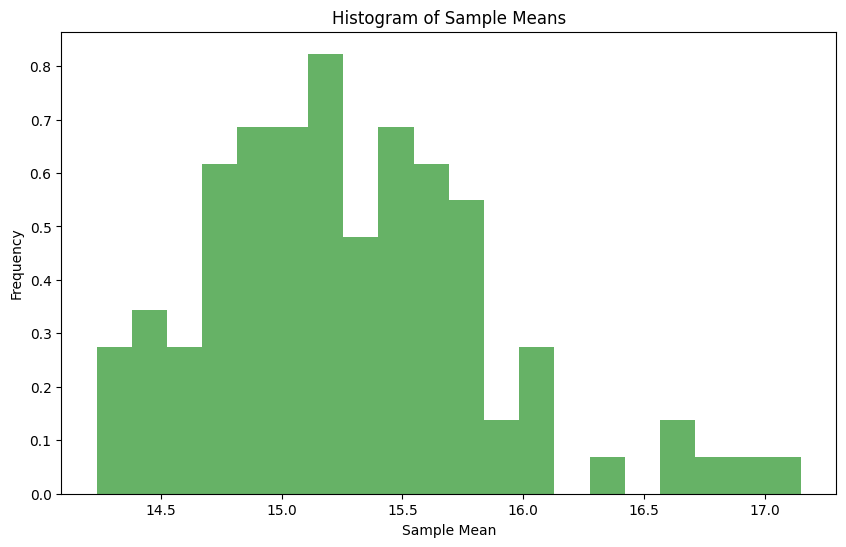

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Assuming df is your DataFrame containing the 'actual_river_slope' data
actual_river_slope = df2['Actual_river_slope']

# Step 1: Generate 100 samples of 2000 observations each with replacement
sample_means = []
num_samples = 100
sample_size = 2000

for _ in range(num_samples):
    sample = np.random.choice(actual_river_slope, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Step 2: Plot the histogram of means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=20, density=True, alpha=0.6, color='g')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

# Step 3: Test if the sample means are drawn from a normal distribution
shapiro_test_statistic, shapiro_p_value = stats.shapiro(sample_means)
print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("Shapiro-Wilk p-value:", shapiro_p_value)

alpha = 0.05  # Significance level

if shapiro_p_value > alpha:
    print("The sample means appear to be drawn from a normal distribution (fail to reject H0)")
else:
    print("The sample means do not appear to be drawn from a normal distribution (reject H0)")

plt.show()
